In [1]:
import sys
sys.path.append("../")

In [2]:
from src.nnsrc.dense import NeuralNetwork

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [4]:
from matplotlib.pyplot import plot, legend

In [5]:
data = pd.read_csv('../src/data/regression/data.cube.train.100.csv')
X = data[["x"]].values
Y = data["y"].values.reshape(-1,1)

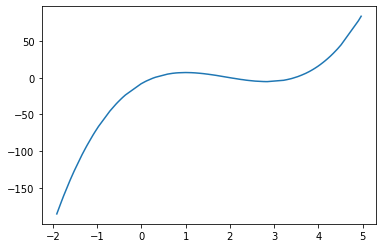

In [6]:
plot(*zip(*sorted(zip(data.x, data.y))))

In [7]:
X_train_scaler = MinMaxScaler((0,1))
Y_train_scaler = MinMaxScaler((0,1))
X_normed = X_train_scaler.fit_transform(X)
y_normed = Y_train_scaler.fit_transform(Y)

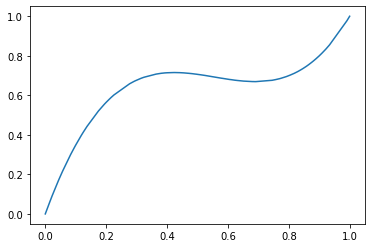

In [8]:
plot(*zip(*sorted(zip(X_normed, y_normed))))

In [9]:
#X_normed = X
#y_normed = y

In [10]:
copy_Y_normed = y_normed.copy()

In [11]:
nn2 = NeuralNetwork(seed=1, n_layers=5,
                    n_neurons_per_layer=[1, 50,  50, 50, 1], act_funcs=['relu', 'relu','relu', 'relu', 'linear'],
                    bias=True, problem='regression')

for layer in nn2.layers:
    print(layer.name, layer.input_dim, layer.output_dim)

history = nn2.train(X_normed.T, y_normed, 15000, 0.7, full_history=True, full_history_freq=1000)

Dense_0 1 1
Dense_1 1 50
Dense_2 50 50
Dense_3 50 50
Dense_4 50 1


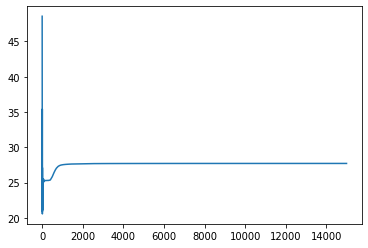

In [12]:
plot(history['metrics'])

In [13]:
y_hat = nn2.predict(X_normed.T).T

In [14]:
y_hat.shape

(100, 1)

In [15]:
len(y_hat)

100

0.912329802372487


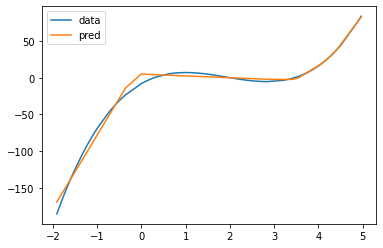

In [16]:
#y_hat = MinMaxScaler().fit_transform(y_hat.reshape(-1,1))
data['y_predicted'] = Y_train_scaler.inverse_transform(y_hat).reshape(-1,1)
plot(*zip(*sorted(zip(data.x, data.y))), label='data')
plot(*zip(*sorted(zip(data.x, data.y_predicted))), label='pred')
legend()
print(1 - np.linalg.norm(y_hat - y_normed)/(np.linalg.norm(y_normed.mean()-y_normed)))

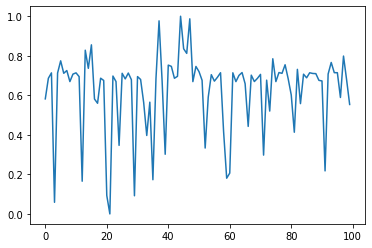

In [17]:
plot(y_normed)

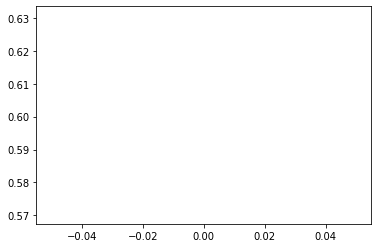

In [18]:
plot(y_hat[0])

In [19]:
grads, caches, weights, biases = history['grads'], history['caches'], history['weights'], history['biases']

In [20]:
grad, cache, weight, bias = grads[0], caches[0], weights[0], biases[0]

In [21]:
import graphviz

In [22]:
def viz_model(model):
    pass

In [23]:
def viz_forward_pass(model, cache, weight, bias):
    pass

def viz_backward_pass(model, grad, weight, bias):
    pass

In [24]:
from src.visualization.visualize import ann_viz

In [25]:
c = ann_viz(nn2)

In [26]:
from graphviz import Digraph

g = Digraph('G', filename='hello.gv')
g.graph_attr.update(splines="false", nodesep='1', ranksep='2');

In [27]:
nn2.n_neurons_per_layer = [1,5, 5, 5, 1]

In [28]:
bias[1].shape

(50,)

In [48]:
weight[2][0]

array([0.09325955, 0.06968182, 0.00660002, 0.07554631, 0.07538762,
       0.09230245, 0.07115248, 0.0124271 , 0.00198801, 0.0026211 ,
       0.00283065, 0.02462111, 0.08600279, 0.05388311, 0.0552822 ,
       0.08420309, 0.01241733, 0.02791837, 0.05857593, 0.09695957,
       0.05610302, 0.00186473, 0.08006327, 0.02329743, 0.08071052,
       0.03878606, 0.08635419, 0.07471216, 0.05562402, 0.01364552,
       0.00599177, 0.01213435, 0.00445519, 0.01074941, 0.02257093,
       0.0712989 , 0.0559717 , 0.0012556 , 0.00719743, 0.09672763,
       0.05681005, 0.02032932, 0.02523257, 0.07438259, 0.01954295,
       0.05813589, 0.097002  , 0.08468288, 0.02398478, 0.04937697])

In [72]:
def ann_viz_forward_pass(model, cache, weights, biases, sample_id, view=True, filename="network.gv", title="My Neural Network"):
    """Vizualizez a Sequential model.

    # Arguments
        model: A Keras model instance.

        view: whether to display the model after generation.

        filename: where to save the vizualization. (a .gv file)

        title: A title for the graph
    """
    from graphviz import Digraph;
    import json;
    input_layer, hidden_layers, output_layer = model.n_neurons_per_layer[0], model.n_neurons_per_layer[1:-1], \
                                               model.n_neurons_per_layer[-1]
    last_layer_nodes = input_layer;
    nodes_up = input_layer;

    g = Digraph('g', filename=filename);
    n = 0;
    g.graph_attr.update(splines="false", nodesep='1', ranksep='2');
    #Input Layer
    with g.subgraph(name='cluster_input') as c:
        the_label = title+'\n\n\n\nInput Layer';
        #if (int(str(model.layers[0].input_shape).split(",")[1][1:-1]) > 10):
        #    the_label += " (+"+str(int(str(model.layers[0].input_shape).split(",")[1][1:-1]) - 10)+")";
        #    input_layer = 10;
        c.attr(color='white')
        for i in range(0, input_layer):
            n += 1;
            c.node(str(n));
        c.attr(label=the_label)
        c.attr(rank='same');
        c.node_attr.update(color="#2ecc71", style="filled", fontcolor="#2ecc71", shape="circle");
    for i in range(0, len(hidden_layers)):
        with g.subgraph(name="cluster_"+str(i+1)) as c:
            c.attr(color='white');
            c.attr(rank='same');
            #If hidden_layers[i] > 10, dont include all
            the_label = "";
            #if (int(str(model.layers[i].output_shape).split(",")[1][1:-1]) > 10):
            #    the_label += " (+"+str(int(str(model.layers[i].output_shape).split(",")[1][1:-1]) - 10)+")";
            #    hidden_layers[i] = 10;
            c.attr(labeljust="right", labelloc="b", label=the_label);
            for j in range(0, hidden_layers[i]):
                n += 1;
                c.node(str(n), shape="circle", style="filled", color="#3498db", fontcolor="#3498db");
                for h in range(nodes_up - last_layer_nodes + 1 , nodes_up + 1):
                    print(i+1, h,n)
                    lbl = weights[i+1][h][n][0]
                    g.edge(str(h), str(n), label=lbl);
            last_layer_nodes = hidden_layers[i];
            nodes_up += hidden_layers[i];
    with g.subgraph(name='cluster_output') as c:
        c.attr(color='white')
        c.attr(rank='same');
        c.attr(labeljust="1");
        for i in range(1, output_layer+1):
            n += 1;
            c.node(str(n), shape="circle", style="filled", color="#e74c3c", fontcolor="#e74c3c");
            for h in range(nodes_up - last_layer_nodes + 1 , nodes_up + 1):
                g.edge(str(h), str(n));
        c.attr(label='Output Layer', labelloc="bottom")
        c.node_attr.update(color="#2ecc71", style="filled", fontcolor="#2ecc71", shape="circle");

    g.attr(arrowShape="none");
    g.edge_attr.update(arrowhead="none", color="#707070");
    if view == True:
        g.view();
    return g

In [73]:
weight[0]

array([[1.]])

In [74]:
weight

[array([[1.]]),
 array([[1.14374817e-05],
        [3.02332573e-02],
        [1.46755891e-02],
        [9.23385948e-03],
        [1.86260211e-02],
        [3.45560727e-02],
        [3.96767474e-02],
        [5.38816734e-02],
        [4.19194514e-02],
        [6.85219500e-02],
        [2.04452250e-02],
        [8.78117436e-02],
        [2.73875932e-03],
        [6.70467510e-02],
        [4.17304802e-02],
        [5.58689828e-02],
        [1.40386939e-02],
        [1.98101489e-02],
        [8.00744569e-02],
        [9.68261576e-02],
        [3.13424178e-02],
        [6.92322616e-02],
        [8.76389152e-02],
        [8.94606664e-02],
        [8.50442114e-03],
        [3.90547832e-03],
        [1.69830420e-02],
        [8.78142503e-02],
        [9.83468338e-03],
        [4.21107625e-02],
        [9.57889530e-02],
        [5.33165285e-02],
        [6.91877114e-02],
        [3.15515631e-02],
        [6.86500928e-02],
        [8.34625672e-02],
        [1.82882773e-03],
        [7.50144315e-0

In [78]:
weight[1][1]

array([0.03023326])

In [76]:
weight[1][1][2]

IndexError: index 2 is out of bounds for axis 0 with size 1

In [75]:
ann_viz_forward_pass(nn2, cache, weight, bias, sample_id=10)

1 1 2


IndexError: index 2 is out of bounds for axis 0 with size 1

In [30]:
grad['dA_curr4'][0][0]

0.3327421258445862

In [31]:
cache['A0'][0][0]

0.211536442212216

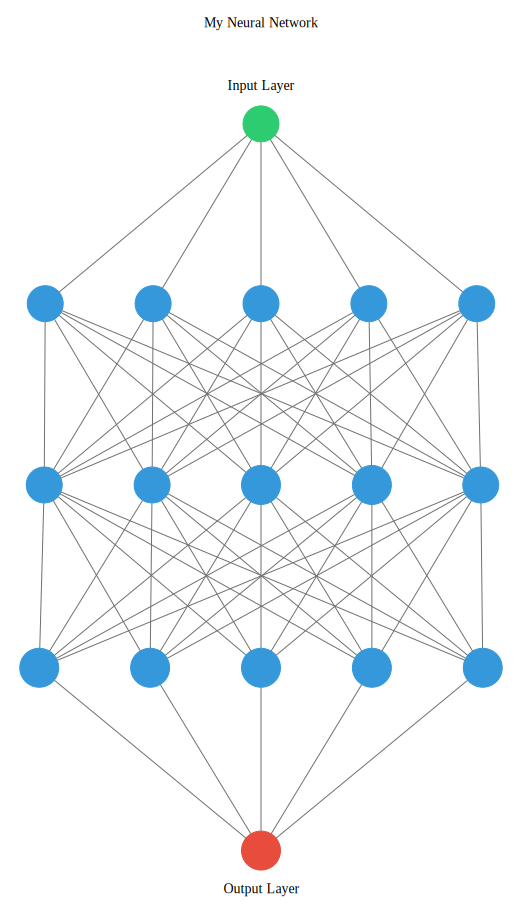

In [32]:
ann_viz(nn2, view=False)